# Linear Discriminant Analysis (LDA)

## Introduction to LDA

**Linear Discriminant Analysis (LDA)** is a statistical method used for dimensionality reduction and classification in machine learning. At its core, LDA seeks to find the linear combinations of features that best separate different classes in a dataset. This allows for efficient representation of data while maximizing class separability.

### Historical Context
```{image} fisher.jpg
:alt: Ronald A. Fisher
:class: bg-primary mb-1
:width: 200px
:align: center
```
Introduced by Ronald A. Fisher in the 1930s, LDA has since become a fundamental tool in the fields of statistics and machine learning. Fisher formulated LDA as a means to find the linear combination of features that maximizes the ratio of between-class variance to within-class variance.

## Theoretical Foundations of LDA

### Mathematical Formulation

#### Objective Function

The primary goal of LDA is to maximize the between-class scatter while minimizing the within-class scatter. The objective function can be expressed as:

$$J(W) = \frac{{\det(W^{-1}B)}}{{\det(W^{-1}W)}}$$

where $(W)$ is the weight matrix, $(B)$ is the between-class scatter matrix, and $(W^{-1})$ denotes the inverse of $(W)$.

#### Eigenvalue Decomposition

To maximize the objective function, LDA involves the eigenvalue decomposition of \(W^{-1}B\). The eigenvectors corresponding to the largest eigenvalues form the basis for the discriminant subspace.

$$ W^{-1}Bv_i = \lambda_i v_i $$

where $(v_i)$ is the $(i)$-th eigenvector, and $(\lambda_i)$ is the corresponding eigenvalue.


### Assumptions and Limitations

#### Assumptions
1. **Multivariate Normality:** LDA assumes that the features in each class follow a multivariate normal distribution.
2. **Equality of Covariance Matrices:** It assumes that the covariance matrices of different classes are equal.

#### Limitation
1. **Sensitive to Outliers:** LDA can be sensitive to outliers, impacting its performance.
2. **Assumption Violations:** If the assumptions are violated, the effectiveness of LDA may be compromised.

```{warning}
Considering these limitatuins is essential for practitioners to use LDA effectively and understand potential challenges or issues that may arise when applying the method to real-world datasets.
```

## Purpose of LDA

LDA serves a dual purpose: it reduces the dimensionality of the data while retaining information relevant for classification, making it a versatile technique in machine learning applications.

## Dimensionality Reduction with LDA

In high-dimensional spaces, the distance between data points increases, making algorithms prone to overfitting. Working with lower-dimensional data can lead to more computationally efficient models. Therefore, reduced dimensionality makes it easier to visualize data and its inherent patterns. 
LDA is often used for dimensionality reduction. The primary goal is to transform the original feature space into a lower-dimensional space while preserving the discriminatory information between classes. In other words, LDA looks for a projection of the data in a way that maximizes the separation between different classes.

### Objectives of Dimensionality Reduction

1. LDA aims to **maximize the distance between the means** of different classes, enhancing class separability.

2. Simultaneously, LDA seeks to **minimize the scatter within each class**, ensuring compact clusters.

```{admonition} Note
:class: note
LDA accomplishes these objectives by finding a subspace that best captures the essential information for classification.
```

## Classification using LDA

Once LDA has been applied for dimensionality reduction, it can be employed for classification tasks. The process involves training the model on a labeled dataset, where the class labels are known, and learning the discriminative patterns in the reduced-dimensional space.

### Working Principle of LDA in Classification

1. LDA aims to find decision boundaries that best separate different classes in the reduced space.

2. LDA can be interpreted as a probabilistic model. It models the distribution of features for each class and uses Bayes' theorem to calculate the probability of a data point belonging to a particular class.

3. Given a set of features for an unseen data point, LDA can predict the most likely class based on the learned discriminative patterns during training.

### Applications of LDA in Classification

- **Face Recognition:**
  LDA is commonly used for face recognition tasks where reducing the dimensionality of facial features enhances the accuracy of recognition.

- **Medical Diagnosis:**
  In medical diagnostics, LDA can help classify patients into different diagnostic categories based on relevant features.

- **Speech Recognition:**
  LDA can be applied to features extracted from speech signals to classify spoken words or phrases.

```{admonition} Fraud Detection in Banking
:class: tip, dropdown
### What's the Problem?
- Banks need to **distinguish real and fake transactions** in huge amounts of data.
### How Does LDA Help?
- It **learns the difference** between normal and suspicious transactions by looking at data patterns.
### The Main Goal
- To **clearly separate** regular transactions from the fraudulent ones.
### How It's Done
1. **Clean and organize** the transaction data first.
2. Then, use LDA to **find the most telling signs** of fraud in the data.
### What's the Result?
- A system that **spots fraud** by seeing how much a transaction differs from the usual pattern.
### Why It Matters
- Helps banks **catch fraud more effectively**, keeping everyone's money safer.
```

# Step by Step Guide to Implementing LDA

## Data Preprocessing

```{warning}
Before applying LDA, ensure proper data preprocessing.
```

1. **Handling Missing Values**
   - Address any missing values in the dataset. Fill in missing values or remove instances with missing data to ensure a complete dataset.

2. **Scaling Features**
   - Standardize or normalize features. This step ensures that all features contribute equally to the analysis, preventing any particular feature from dominating the model due to its scale.

3. **Checking Assumptions**
   - Verify that your data meets LDA assumptions. LDA assumes that the features in each class follow a multivariate normal distribution, and the covariance matrices of different classes are equal.


## Model Training

```{admonition} Where the fun begins
:class: note 
Now, let's delve into the details of training your LDA model.
```

#### 1. Compute Covariance Matrices:

The within-class covariance matrix $(S_W)$ and the between-class covariance matrix $(S_B)$ are calculated as follows:

- Within-class covariance matrix $(S_W)$:

  $$S_W = \sum_{i=1}^{c} \sum_{j=1}^{n_i} (x_{ij} - \mu_i)(x_{ij} - \mu_i)^T$$
 
  where $(c)$ is the number of classes, $(n_i)$ is the number of samples in class $(i)$, $(x_{ij})$ is the $(j)$-th sample from class $(i)$, and $(\mu_i)$ is the mean vector of class $(i)$.

- Between-class covariance matrix $(S_B)$:
  
  $$S_B = \sum_{i=1}^{c} n_i (\mu_i - \mu)(\mu_i - \mu)^T$$
  
  where $(c)$ is the number of classes, $(n_i)$ is the number of samples in class $(i)$, $(\mu_i)$ is the mean vector of class $(i)$, and $(\mu)$ is the overall mean vector.

#### 2. Solve Eigenvalue Problem:

Next, solve the eigenvalue problem to obtain the eigenvalues $\lambda$ and corresponding eigenvectors $(v)$ of the matrix $(S_W^{-1}S_B)$. This involves solving the following equation:
  
  $$S_W^{-1}S_Bv = \lambda v$$

#### 3. Select Discriminant Functions:

Choose the top $(k)$ eigenvectors corresponding to the $(k)$ largest eigenvalues to form the matrix $(W)$. The discriminant functions can be defined as:

  $$Y = XW$$ 

  where $(Y)$ is the transformed feature matrix, $(X)$ is the original feature matrix, and $(W)$ contains the selected eigenvectors.

These discriminant functions will serve as the basis for making predictions and defining decision boundaries in your LDA model.

## Evaluation Metrics

After training your LDA model, it's crucial to assess its performance using various evaluation metrics. These metrics provide insights into how well the model generalizes to new, unseen data.
{ref}`Classification Metrics we have seen so far <classification-metrics>`



```{admonition} Remember
:class: Warning 
Evaluating your model using these metrics is crucial to understanding its strengths and weaknesses, guiding potential improvements, and ensuring its suitability for real-world applications.
```

## LDA Implementation

```{admonition} Try it
:class: tip
Feel free to adapt the code to your specific dataset and requirements.

Let's use LDA Classification for the **Iris dataset**

In [3]:
import seaborn as sns
data = sns.load_dataset("iris")
# to show some sample data
display(data.head(3)) 
# to show information about data types and counts of Non Null
data.info() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We will transform the class labels (setosa, versicolor, virginica) to numeric values (1,2,3) for convenience. We can do this by simply calling a function called LabelEndoder from sckit-learn library.

In [4]:
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:,0:4].values
y = data['species'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

Just to get a rough idea how the samples of our three classes Setosa, Versicolor and Virginica are distributed, let us visualize the distributions of the four different features in 1-dimensional histograms.

```{image} 1d_histogram.png
:alt: The distributions of the four different features of the Iris dataset in 1-dimensional histograms.
:class: bg-primary mb-1
:align: center
```

```{admonition} Code for above histograms
:class: note, dropdown

```python
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       
plt.show()
```

From just looking at these simple graphical representations of the features, we can already tell that the petal lengths and widths are likely better suited as potential features two separate between the three flower classes. In practice, instead of reducing the dimensionality via a projection (here: LDA), a good alternative would be a feature selection technique. For low-dimensional datasets like Iris, a glance at those histograms would already be very informative.

##### Dimension Reduction

We will first try to use LDA to reduce the number of features. LDA reduces dimensionality from original number of feature to
(C-1) features, where C is the number of classes. In this case, we have 3 classes, therefore the new feature space will have only 2 features

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Calling LDA
lda_as_dimension_reduction = LDA(n_components=2)
X_lda_sklearn = lda_as_dimension_reduction.fit_transform(X, y)

print('(Rows,Columns) of the original data is ',X.shape)
print('\n After LDA Dimension Reductionn we have', X_lda_sklearn.shape)

(Rows,Columns) of the original data is  (150, 4)

 After LDA Dimension Reductionn we have (150, 2)


Now, let’s express the “explained variance” as percentage:


In [15]:
## Explaning the varianvce for the new features created
print('Variance explained:\n')
for i,j in enumerate(lda_as_dimension_reduction.explained_variance_ratio_):
    print(f'LDA {i+1}: {j:.2%}')

Variance explained:

LDA 1: 99.12%
LDA 2: 0.88%


The LDA 1 is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this.

What we are going to do next is to visualize the 2 columns created by LDA and see how the class are separated.

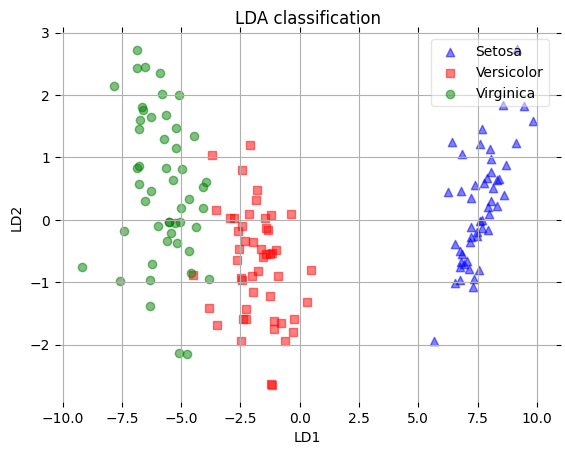

In [21]:
# Create a function for plotting 
from matplotlib import pyplot as plt
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_scikit_lda(X_lda_sklearn, title='LDA classification')

The scatter plot above represents our new feature subspace that we constructed via LDA. We can see that the first linear discriminant **LD1** separates the classes quite nicely. However, the second discriminant, **LD2**, does not add much valuable information,which we’ve already concluded when we looked at the ranked varianvce explained.

That's it we are able to use LDA to reduce thnumberer of features **from 4 to 2** 

Finally, let't move on to the classification task itself.

### Split Train and Test data

For the classification task, since we don't have a test dataset we are going to split our original data. 70% will be used for training the model and 30% will be used as validation.
To split our data we are going to call function train_test_split from scikit-learn library.

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=12345)
 
print("\nSize of the dataset")
print("All data:", X.shape)
print("Training:", X_test.shape)    
print("Validation:", X_train.shape) 
    
print("\nProportion of 'TARGETS' in the dataset")
print("All data:", np.bincount(y)[1:] / float(len(y)))
print("Validation:", np.bincount(y_test)[1:] / float(len(y_test))) 
print("Training:", np.bincount(y_train)[1:] / float(len(y_train)))   


Size of the dataset
All data: (150, 4)
Training: (105, 4)
Validation: (45, 4)

Proportion of 'TARGETS' in the dataset
All data: [0.33333333 0.33333333 0.33333333]
Validation: [0.33333333 0.33333333 0.33333333]
Training: [0.33333333 0.33333333 0.33333333]


In [18]:
# Transform data to follow assumption 2 regarding variance of the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

# Scaling Train Set
X_train = scaler.transform(X_train)
# Scaling Test Set
X_test = scaler.transform(X_test)

In [19]:
lda_for_classification = LDA(shrinkage=None, solver='svd')
lda_for_classification.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [20]:
from sklearn.metrics import classification_report

# Score Training Data Set
y_true = y_train
y_pred = lda_for_classification.predict(X_train)
target_names = ['Setosa', 'Versicolor', 'Virginica']
print('Training REPORT')
print(classification_report(y_true, y_pred, target_names=target_names))

# Score Validation Data Set
y_true = y_test
y_pred = lda_for_classification.predict(X_test)
target_names = ['Setosa', 'Versicolor', 'Virginica']
print('Validation REPORT')
print(classification_report(y_true, y_pred, target_names=target_names))

Training REPORT
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        15
   Virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Validation REPORT
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        35
  Versicolor       0.97      0.97      0.97        35
   Virginica       0.97      0.97      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105


That's it! We are done with the implementation of LDA as a classifier. 
We are able to classify the IRIS dataset and have high performance metrics as it could be seen above